<a href="https://colab.research.google.com/github/ShrungaM/Hotel-Booking-Analysis/blob/main/Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

##Importing the necessary libraries and reading the file

In [74]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Importing Warnings To Ignore the Warning
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [75]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [76]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Python/datasets/Hotel Bookings.csv')
# df = pd.read_csv('/content/drive/MyDrive/Data/Hotel Bookings.csv')    #Path for Sneha

##Data Exploration

In [77]:
# First Look
df.head() 

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [78]:
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,0.0,0,HB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [79]:
#Familiarise with the columns in the dataset and their data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [80]:
#Statistics of the dataset
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [81]:
# Finding Any Null Value Present in the data set
df.isnull().values.any()

True

In [82]:
# Total Number Of Count Of Null Values Present In The Respective Columns
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [83]:
#Checking the percentage of null values present in the dataset
df.isnull().sum()/len(df.index)*100

hotel                              0.000000
is_canceled                        0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.003350
babies                             0.000000
meal                               0.000000
country                            0.408744
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                    

####we see that there are 119390 records out of which columns agent and company has the most missing values.

##Data Cleaning

####After our first look at the dataset, since agent and company columns has the most number of missing values, lets not consider these columns in our analysis. So lets go and drop these columns.

In [84]:
df.drop(['agent','company'],axis=1,inplace=True)

In [85]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03


####Let us move to further. We can see that the arrival date is not in the correct format. So we can create one more column with correct date format

In [86]:
#Converting the columns to string datatype 
df['arrival_date_day_of_month'] = df['arrival_date_day_of_month'].astype('string')
df['arrival_date_month'] = df['arrival_date_month'].astype('string')
df['arrival_date_year'] = df['arrival_date_year'].astype('string')

In [87]:
#Concatenating the columns and again converting it to datetime
df['arrival_date'] = df['arrival_date_day_of_month'] + '-' + df['arrival_date_month'] + '-' + df['arrival_date_year']
df['arrival_date'] = pd.to_datetime(df['arrival_date'])

In [88]:
df['arrival_date'].head()

0   2015-07-01
1   2015-07-01
2   2015-07-01
3   2015-07-01
4   2015-07-01
Name: arrival_date, dtype: datetime64[ns]

####Also convert reservation_status_date into date format

In [89]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date']) #Converting to datetime datatype

####Now let us shift our focus to the very first column in our dataset i.e, is_canceled. As the name suggests this column says if the booking is cancelled or not.

In [90]:
#Lets us see what all values this column contains
df['is_canceled'].unique()

array([0, 1])

#####Let us consider value 0 as bookings that are not cancelled and 1 as cancelled bookings.

####Let us move to the next column (lead_time). Lead time is the time between booking(reservation) made and the actual arrival. 
Seems interesting isn't it. Let us know more about is column.
Usually lead time is given in days

In [91]:
df['lead_time'].describe()

count    119390.000000
mean        104.011416
std         106.863097
min           0.000000
25%          18.000000
50%          69.000000
75%         160.000000
max         737.000000
Name: lead_time, dtype: float64

#####as we can observe, lead time has the maximun value of 737 and mean of 69 days.
We can say that lead time greater than 200 days is queit unusual.
Nobody books a hotel before 200 days(almost 6 months) earlier

In [92]:
# find all the lead time greater than 200
df.loc[df['lead_time']>200,'lead_time']

0         342
1         737
81        368
82        364
85        324
         ... 
119369    207
119370    201
119374    201
119378    247
119389    205
Name: lead_time, Length: 20647, dtype: int64

#####we gave 20647 records out of 119390 where lead time is greater than 200. So Replacing them with median of lead time less than 200.

In [93]:
#Find the index where lead_time >200 and replace the with lead_time<200
df.loc[df['lead_time']>200,'lead_time']=df.loc[df['lead_time']<=200,'lead_time'].median()
#After replacing the data tyoe is chaged to float. change it back to int again 
df['lead_time'] = df['lead_time'].astype('int')                                          

In [94]:
type(df['lead_time'][0])

numpy.int64

####Moving forward we can create one more column to calculate total stay of guests by adding stay_in_weekend_nights and stay_in_week_nights

In [95]:
df['stay_duration']=df['stays_in_week_nights']+df['stays_in_weekend_nights']

In [96]:
df['stay_duration'].value_counts()

2     27643
3     27076
1     21020
4     17383
7      8655
5      7784
6      3857
8      1161
10     1139
14      916
9       841
0       715
11      396
12      223
13      142
15       75
21       71
16       40
25       37
28       35
18       35
19       22
17       20
22       14
29       14
20       14
30       13
23        8
26        6
24        6
27        5
35        5
42        4
33        3
56        2
57        1
34        1
38        1
43        1
69        1
45        1
46        1
48        1
49        1
60        1
Name: stay_duration, dtype: int64

#####Stay duration 0 means that the guests didn't stay in the night.
This does not indicate absurd data

####Lets move on to days_in_waiting_list column. As the name suggests this column has the number of days the booking was kept in waiting list before it was confirmed by the hotel.

In [97]:
df['days_in_waiting_list'].value_counts()

0      115692
39        227
58        164
44        141
31        127
        ...  
175         1
117         1
89          1
92          1
183         1
Name: days_in_waiting_list, Length: 128, dtype: int64

#####Since we replace lead_time <200, now it makes no sense if the days in waiting list column has data greater than 200 
(we dont have bookings made before 200 days of arrival, so waiting time cant be more than 200 days)

In [98]:
df.loc[df['days_in_waiting_list']<=200,'days_in_waiting_list'].median()

0.0

In [99]:
#Find the index where days_in_waiting_list >200 and replace the with days_in_waiting_list<200 
df.loc[df['days_in_waiting_list']>200,'days_in_waiting_list'] = df.loc[df['days_in_waiting_list']<=200,'days_in_waiting_list'].median()                  
                                                                   

In [100]:
#After replacing, the data type is chaged to float. change it back to int again
df['days_in_waiting_list'] = df['days_in_waiting_list'].astype('int')

In [101]:
###############Check again#####################
#type(df['days_in_waiting_list'][0])

####Lets understand about the adr column
ADR means the average daily revenue (daily revenue the hotel manages to collect from all the rooms on an average)

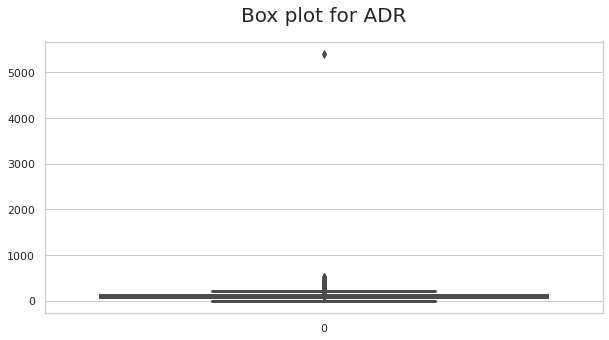

In [102]:
#Box Plot to find the outliers in ADR
plt.figure(figsize=(10,5))
plt.title("Box plot for ADR",fontsize=20,pad=20)           #####################  X and Y label ?
sns.boxplot(data = df['adr'],linewidth=3)
plt.show()

#####we can see that there are outliers

#####There is one resort hotel that is having negative adr.
Hotel that is running in loss

In [103]:
df[df['adr']<0]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,stay_duration
14969,Resort Hotel,0,195,2017,March,10,5,4,6,2,0.0,0,BB,GBR,Groups,Direct,1,0,2,A,H,2,No Deposit,0,Transient-Party,-6.38,0,0,Check-Out,2017-03-15,2017-03-05,10


#####We can consider values above 1000 and below 0 as outliers from the above plot

In [104]:
# Finding all the outlier index
outliers_index = list(df[(df['adr']>1000) | (df['adr']<0)].index)   
outliers_index

[14969, 48515]

In [105]:
#Dropping the outliers
df.drop(outliers_index,axis=0,inplace=True) 

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119388 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119388 non-null  object        
 1   is_canceled                     119388 non-null  int64         
 2   lead_time                       119388 non-null  int64         
 3   arrival_date_year               119388 non-null  string        
 4   arrival_date_month              119388 non-null  string        
 5   arrival_date_week_number        119388 non-null  int64         
 6   arrival_date_day_of_month       119388 non-null  string        
 7   stays_in_weekend_nights         119388 non-null  int64         
 8   stays_in_week_nights            119388 non-null  int64         
 9   adults                          119388 non-null  int64         
 10  children                        119384 non-null  float64

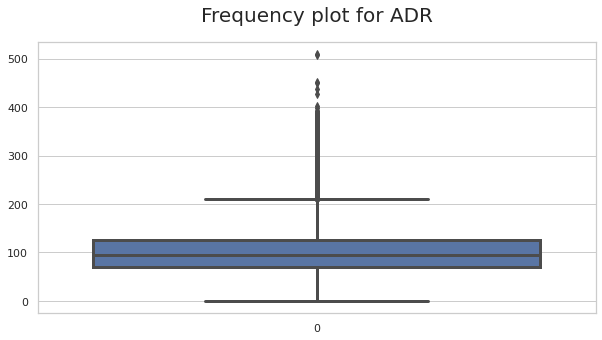

In [107]:
plt.figure(figsize=(10,5))                                   #Need to analyse further
plt.title("Frequency plot for ADR",fontsize=20,pad=20)       ################Check
sns.boxplot(data = df['adr'],linewidth=3)
plt.show()

####Moving on to customer_type, market_segment, distribution_channel,is_repeated_guest

In [108]:
df['customer_type'].unique()

array(['Transient', 'Contract', 'Transient-Party', 'Group'], dtype=object)

In [109]:
df['market_segment'].unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Undefined', 'Aviation'], dtype=object)

In [110]:
df['distribution_channel'].unique()

array(['Direct', 'Corporate', 'TA/TO', 'Undefined', 'GDS'], dtype=object)

In [111]:
df['is_repeated_guest'].unique()

array([0, 1])

#####As there are no null values in these columns, there is no need to manipulate these columns

####Lets us move to the column country now

This indicates the location of the resort.

Since there are only 488 (0.40%) null values in this column, we can drop the null records

In [112]:
#fetching the index of country with null values
country_null_index = list(df.loc[df['country'].isnull()].index)  

In [113]:
#dropping countries with null values
df.drop(country_null_index,axis=0,inplace=True)

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118900 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           118900 non-null  object        
 1   is_canceled                     118900 non-null  int64         
 2   lead_time                       118900 non-null  int64         
 3   arrival_date_year               118900 non-null  string        
 4   arrival_date_month              118900 non-null  string        
 5   arrival_date_week_number        118900 non-null  int64         
 6   arrival_date_day_of_month       118900 non-null  string        
 7   stays_in_weekend_nights         118900 non-null  int64         
 8   stays_in_week_nights            118900 non-null  int64         
 9   adults                          118900 non-null  int64         
 10  children                        118896 non-null  float64

####Moving on to booking_changes column

More than 10 booking changes in a single booking is unusual. So lets replace those values with the median

In [115]:
#replacing booking changes more than 10 with median value
df.loc[df['booking_changes']>=10,'booking_changes'] = df.loc[df['booking_changes']<10,'booking_changes'].median()    

In [116]:
#changing the datatype to int
df['booking_changes'] = df['booking_changes'].astype('int')

In [117]:
#checking the values in booking changes column after manipulation
df['booking_changes'].value_counts()

0    100936
1     12638
2      3789
3       925
4       375
5       118
6        63
7        31
8        17
9         8
Name: booking_changes, dtype: int64

####Cleaning the children, babies and adults column

Since there are only 0.003% null values in this column, assigning them to 0

In [118]:
df.loc[df['children'].isnull(),'children']=0     # assigned children null values to zero     ###############Check drop?
df['children']=df['children'].astype('int')      # changed datatype of children from float to int

In [119]:
df['babies'].value_counts()

0     117986
1        898
2         14
10         1
9          1
Name: babies, dtype: int64

In [120]:
df['adults'].value_counts()

2     89496
1     22735
3      6198
0       393
4        62
26        5
27        2
20        2
5         2
55        1
50        1
40        1
10        1
6         1
Name: adults, dtype: int64

In [121]:
df['children'].value_counts()

0     110321
1       4852
2       3650
3         76
10         1
Name: children, dtype: int64

In [122]:
#As there wont be any children coming to vacation without adults/parents dropping them com
df[(df['adults']==0)]['children'].value_counts()                   ##########################Check where is it dropped?

2    208
0    170
3     11
1      4
Name: children, dtype: int64

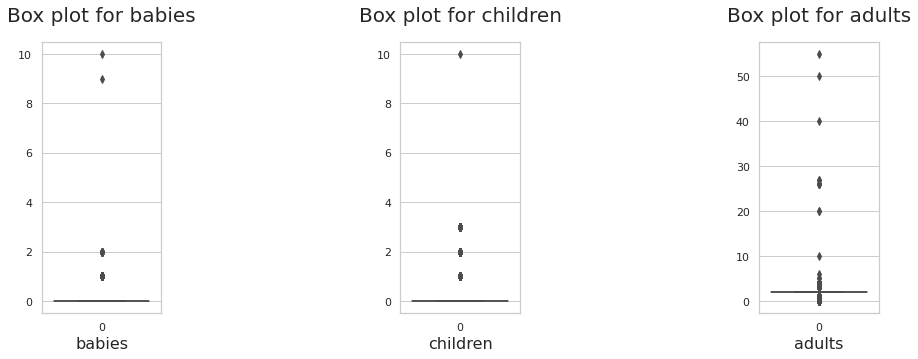

In [123]:
#box plot for outlier detection in babies, children and adults
req_list = ['babies','children','adults']
n=1
plt.figure(figsize=(15,5))
for i in req_list:
  plt.subplot(1,3,n)
  plt.title("Box plot for "+i,fontsize=20,pad=20)
  n = n+1
  sns.boxplot(data = df[i])
  plt.xlabel(i, fontsize=16)
  plt.subplots_adjust(wspace=2)

#####Dropping the outliers

In [124]:
members_outlier_list = list(df[(df['babies']>5) | (df['children']>5) | (df['adults']>10)].index)  

In [125]:
df.drop(members_outlier_list,axis=0,inplace=True)

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118885 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           118885 non-null  object        
 1   is_canceled                     118885 non-null  int64         
 2   lead_time                       118885 non-null  int64         
 3   arrival_date_year               118885 non-null  string        
 4   arrival_date_month              118885 non-null  string        
 5   arrival_date_week_number        118885 non-null  int64         
 6   arrival_date_day_of_month       118885 non-null  string        
 7   stays_in_weekend_nights         118885 non-null  int64         
 8   stays_in_week_nights            118885 non-null  int64         
 9   adults                          118885 non-null  int64         
 10  children                        118885 non-null  int64  

####Creating one more total_members column

In [127]:
#summing up the columns adults, babies and children to get the total members visited
df['Total_members'] = df['adults'] + df['babies'] + df['children']

In [128]:
df['Total_members'].value_counts().sort_index()

0       170
1     22289
2     81881
3     10480
4      3926
5       137
6         1
10        1
Name: Total_members, dtype: int64

#####As we can see 170 records contain total members as 0, it will be irrelavent for our analysis. Hence dropping them

In [129]:
#Find the index where the total members column is 0
irrelavent_total_members = list(df[df['Total_members']==0].index)  

In [130]:
len(irrelavent_total_members)

170

In [131]:
#dropping the irrelavent records
df.drop(irrelavent_total_members,axis=0,inplace=True)

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118715 entries, 0 to 119389
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           118715 non-null  object        
 1   is_canceled                     118715 non-null  int64         
 2   lead_time                       118715 non-null  int64         
 3   arrival_date_year               118715 non-null  string        
 4   arrival_date_month              118715 non-null  string        
 5   arrival_date_week_number        118715 non-null  int64         
 6   arrival_date_day_of_month       118715 non-null  string        
 7   stays_in_weekend_nights         118715 non-null  int64         
 8   stays_in_week_nights            118715 non-null  int64         
 9   adults                          118715 non-null  int64         
 10  children                        118715 non-null  int64  

####Conclusion after wrangling

In [133]:
#resetting the index after all the cleaning
df=df.reset_index().drop('index',axis=1)

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118715 entries, 0 to 118714
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           118715 non-null  object        
 1   is_canceled                     118715 non-null  int64         
 2   lead_time                       118715 non-null  int64         
 3   arrival_date_year               118715 non-null  string        
 4   arrival_date_month              118715 non-null  string        
 5   arrival_date_week_number        118715 non-null  int64         
 6   arrival_date_day_of_month       118715 non-null  string        
 7   stays_in_weekend_nights         118715 non-null  int64         
 8   stays_in_week_nights            118715 non-null  int64         
 9   adults                          118715 non-null  int64         
 10  children                        118715 non-null  int64  

#####After cleaning 118715 records remained for analysis, meaning 99.4 % data is cleaned and retained

##Data Analysis and Visualization (EDA)

####Home country of Guests?

In [244]:
### importing plotly for geoplot
import plotly.express as px

In [245]:
# Getting Guests Home Country with Total Number Of Guest List If the Cancelltion is not done by The Guest 
country_data = df[df['is_canceled']==0]['country'].value_counts().reset_index()

In [246]:
# Need of Only Two Columns 
country_data.columns = ['country','No_of_Guest']

In [247]:
# First Look
country_data.head()

,country,No_of_Guest
0,PRT,20976
1,GBR,9666
2,FRA,8468
3,ESP,6383
4,DEU,6067


In [248]:
# Geoplot Map for Guests Home Country
px.choropleth(country_data,
              locations=country_data['country'],
              color=country_data['No_of_Guest'],
              hover_name=country_data['country'],
              title='Home country Of Guest')

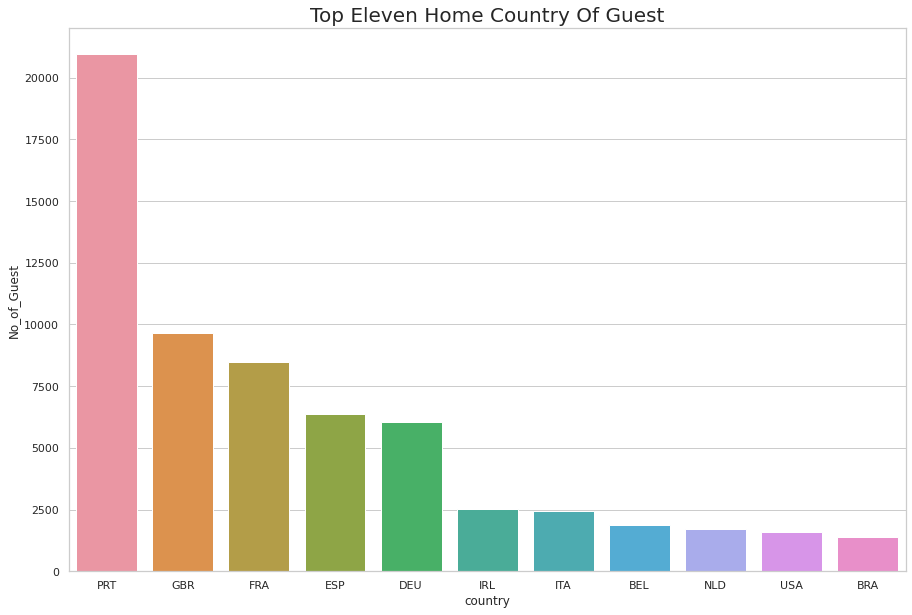

In [249]:
# Bar Plot For Top Ten Country
country_data = country_data[country_data['No_of_Guest'] > 1000]
sns.set(style='whitegrid') # adding gridlines in the graphs (white, dark, whitegrid, darkgrid, ticks)
plt.figure(figsize=(15, 10))
plt.title("Top Eleven Home Country Of Guest", fontsize=20)
sns.barplot(x = country_data['country'][:11],
            y = country_data['No_of_Guest'][:11])


                People from all over the world are staying in these two hotels.
                Most guests are from Portugal and other countries in Europe



#### How much do guests pay for a room per night ?

In [250]:
# Creating New Dataset "data2" for data analysis of pay for room per night
data2 = df[df['is_canceled']==0]


In [251]:
# First Look
data2.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,stay_duration,Total_members
0,Resort Hotel,0,48,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,0,2
1,Resort Hotel,0,48,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,0,2
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,1,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,1,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015-07-01,2,2


##### Both hotels have different room types and different meal arrangements. Seasonal factors are also important. So the prices vary a lot. Since no currency information is given, but Portugal is part of the European Monetary Union, I assume that all prices are in EUR.*

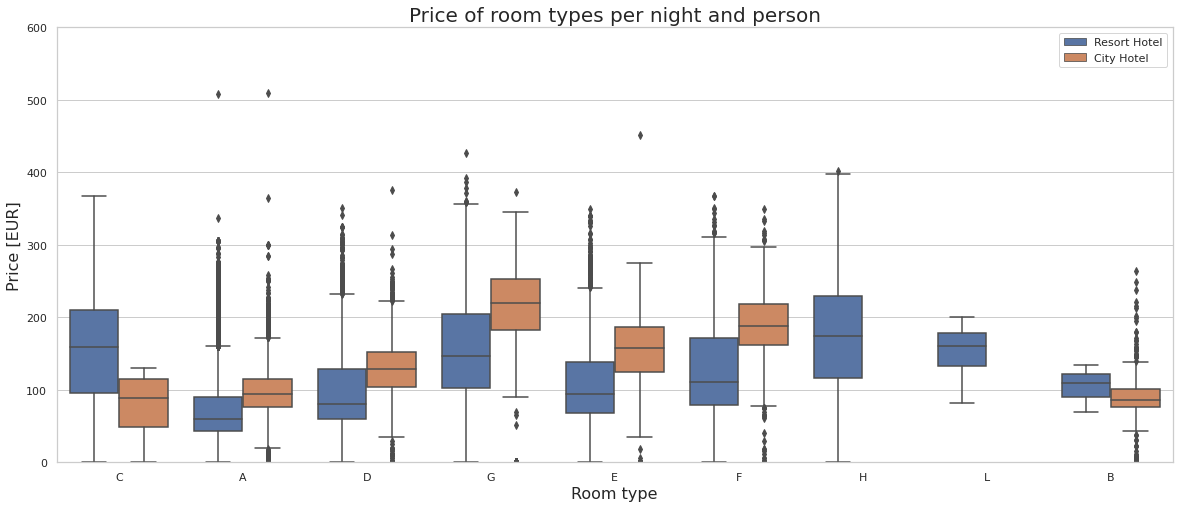

In [252]:
# Box Plot
plt.figure(figsize=(20,8))
sns.boxplot(x='reserved_room_type',y='adr',data=data2,hue='hotel')
plt.title("Price of room types per night and person", fontsize=20)
plt.xlabel("Room type", fontsize=16)
plt.ylabel("Price [EUR]", fontsize=16)
plt.legend(loc="upper right")
plt.ylim(0, 600)
plt.show()

#####**conclusion --->>**
    This figure shows the average price per room, depending on its type and the standard deviation.
    Note that due to data anonymization rooms with the same type letter may not necessarily be the same across hotels.

####Which Month Has The Heighest No Of Cancellation

In [253]:
# First Look
canceled.columns

Index(['index', 'hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'arrival_date',
       'stay_duration', 'Total_members'],
      dtype='object')

In [254]:
canceled.head()

,index,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,stay_duration,Total_members
0,8,Resort Hotel,1,85,2015,July,27,1,0,3,2,0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,82.0,0,1,Canceled,2015-05-06,2015-07-01,3,2
1,9,Resort Hotel,1,75,2015,July,27,1,0,3,2,0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,0,Transient,105.5,0,0,Canceled,2015-04-22,2015-07-01,3,2
2,10,Resort Hotel,1,23,2015,July,27,1,0,4,2,0,0,BB,PRT,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,0,Transient,123.0,0,0,Canceled,2015-06-23,2015-07-01,4,2
3,27,Resort Hotel,1,60,2015,July,27,1,2,5,2,0,0,BB,PRT,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,0,Transient,107.0,0,2,Canceled,2015-05-11,2015-07-01,7,2
4,31,Resort Hotel,1,96,2015,July,27,1,2,8,2,0,0,BB,PRT,Direct,Direct,0,0,0,E,E,0,No Deposit,0,Transient,108.3,0,2,Canceled,2015-05-29,2015-07-01,10,2


In [255]:
# Checking Unique Data
canceled['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [256]:
# Creating New Data frame For Cancellation According to the month for both Resort Hotel and City Hotel
cancel_month = canceled.groupby(['arrival_date_month','hotel']).agg('count').reset_index()
cancelled = cancel_month.iloc[:,0:3]

In [257]:
# First Look
cancelled

,arrival_date_month,hotel,index
0,April,City Hotel,3459
1,April,Resort Hotel,1051
2,August,City Hotel,3600
3,August,Resort Hotel,1636
4,December,City Hotel,1737
5,December,Resort Hotel,626
6,February,City Hotel,1899
7,February,Resort Hotel,794
8,January,City Hotel,1481
9,January,Resort Hotel,324


In [258]:
# Renaming The Columns
cancelled = cancelled.rename(columns={'is_canceled':'no of cancellations'})
cancelled

,arrival_date_month,hotel,index
0,April,City Hotel,3459
1,April,Resort Hotel,1051
2,August,City Hotel,3600
3,August,Resort Hotel,1636
4,December,City Hotel,1737
5,December,Resort Hotel,626
6,February,City Hotel,1899
7,February,Resort Hotel,794
8,January,City Hotel,1481
9,January,Resort Hotel,324


In [259]:
# Arranging The Data According to the Months
final_cancelled = sd.Sort_Dataframeby_Month(cancelled,'arrival_date_month')
final_cancelled

,arrival_date_month,hotel,index
0,January,City Hotel,1481
1,January,Resort Hotel,324
2,February,City Hotel,1899
3,February,Resort Hotel,794
4,March,City Hotel,2384
5,March,Resort Hotel,762
6,April,City Hotel,3459
7,April,Resort Hotel,1051
8,May,City Hotel,3653
9,May,Resort Hotel,1024


In [264]:
# Bar Plot
# plt.figure(figsize=(20, 8))
# plt.title('Cancellations per Month',fontsize=20)
# sns.barplot(x = "arrival_date_month", y = "no of cancellations" , hue="hotel",hue_order = ["City Hotel", "Resort Hotel"], data=final_cancelled)

#####**conclusion --->>** 
    For the City hotel the relative number of cancelations is around 40 % throughout the year.
    For the Resort hotel it is highest in the summer and lowest during the winter.








####How does the price per night vary over the year?

In [265]:
# Seprating the Data set on Reort And City Hotel When The Cancellation is "Zero"
# Zero means The Cancellation Not Done By The Guests

# Resort Hotel Data  seprated when the cancellation is not done
resort = df[(df['hotel']=='Resort Hotel') & (df['is_canceled']==0)]

# City Hotel Data  seprated when the cancellation is not done
city = df[(df['hotel']=='City Hotel') & (df['is_canceled']==0)]


In [266]:
# data_resort have the data of Resort hotel if the cancellation is not done by the Guests
data_resort = resort[resort['is_canceled']==0]


In [267]:
# data_city have the data of City hotel if the cancellation is not done by the Guests
data_city = city[city['is_canceled']==0]



In [268]:
# First Look
data_resort.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,stay_duration,Total_members
0,Resort Hotel,0,48,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,0,2
1,Resort Hotel,0,48,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,0,2
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,1,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,1,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015-07-01,2,2


In [269]:
# First Look
data_city.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,stay_duration,Total_members
39571,City Hotel,0,6,2015,July,27,1,0,2,1,0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-03,2015-07-01,2,1
39577,City Hotel,0,3,2015,July,27,2,0,3,1,0,0,HB,PRT,Groups,TA/TO,0,0,0,A,A,1,No Deposit,0,Transient-Party,58.67,0,0,Check-Out,2015-07-05,2015-07-02,3,1
39581,City Hotel,0,43,2015,July,27,3,0,2,2,0,0,HB,PRT,Groups,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient-Party,86.00,0,0,Check-Out,2015-07-05,2015-07-03,2,2
39582,City Hotel,0,43,2015,July,27,3,0,2,2,0,0,HB,PRT,Groups,TA/TO,0,0,0,A,A,1,No Deposit,0,Transient-Party,43.00,0,0,Check-Out,2015-07-05,2015-07-03,2,2
39583,City Hotel,0,43,2015,July,27,3,0,2,2,0,0,HB,PRT,Groups,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient-Party,86.00,0,0,Check-Out,2015-07-05,2015-07-03,2,2


In [270]:
# adr(average daily rate) mean value grouped on the monthly basis of resort hotel 
resort_hotel = data_resort.groupby('arrival_date_month')['adr'].mean().reset_index()
resort_hotel

,arrival_date_month,adr
0,April,76.176140
1,August,181.348715
2,December,68.634584
3,February,54.468180
4,January,48.994018
5,July,150.483553
6,June,108.133154
7,March,57.433661
8,May,76.734804
9,November,48.882907


In [271]:
# adr(average daily rate) mean value grouped on the monthly basis of city hotel 
city_hotel = data_city.groupby('arrival_date_month')['adr'].mean().reset_index()
city_hotel

,arrival_date_month,adr
0,April,111.962267
1,August,118.674598
2,December,88.401855
3,February,86.520062
4,January,82.330040
5,July,115.818019
6,June,117.874360
7,March,90.658533
8,May,120.669827
9,November,86.946178


In [272]:
# Creating new data set three different columns according to the need
final_data = resort_hotel.merge(city_hotel, on = 'arrival_date_month' )
final_data.columns = ['Month','Resort_Hotel_Price','City_Hotel_Price']

##### Now we will observe over here is month columns is not in order, & if we will visualise we will get improper conclusion so very first we have to provide right hierarchy to the month columns 

In [273]:
# First Look
final_data.head()

,Month,Resort_Hotel_Price,City_Hotel_Price
0,April,76.176140,111.962267
1,August,181.348715,118.674598
2,December,68.634584,88.401855
3,February,54.468180,86.520062
4,January,48.994018,82.330040


In [274]:
# Since the the months are not arranged in the proper method
# we can you different method to arrange it but then it becomes lengthy
# So intstead of that we use the library by intalling it
# library Intalled



In [275]:
pip install sort-dataframeby-monthorweek

In [276]:
pip install sorted-months-weekdays

In [277]:
# Importing Library
import sort_dataframeby_monthorweek as sd

In [278]:
# data is arranging in the proper manner for better analysis 
Final_Data_Arrange = sd.Sort_Dataframeby_Month(final_data,'Month')
Final_Data_Arrange

,Month,Resort_Hotel_Price,City_Hotel_Price
0,January,48.994018,82.330040
1,February,54.468180,86.520062
2,March,57.433661,90.658533
3,April,76.176140,111.962267
4,May,76.734804,120.669827
5,June,108.133154,117.874360
6,July,150.483553,115.818019
7,August,181.348715,118.674598
8,September,96.288897,112.776582
9,October,61.932777,102.006291


In [279]:
Final_Data_Arrange['City_Hotel_Price']

0      82.330040
1      86.520062
2      90.658533
3     111.962267
4     120.669827
5     117.874360
6     115.818019
7     118.674598
8     112.776582
9     102.006291
10     86.946178
11     88.401855
Name: City_Hotel_Price, dtype: float64

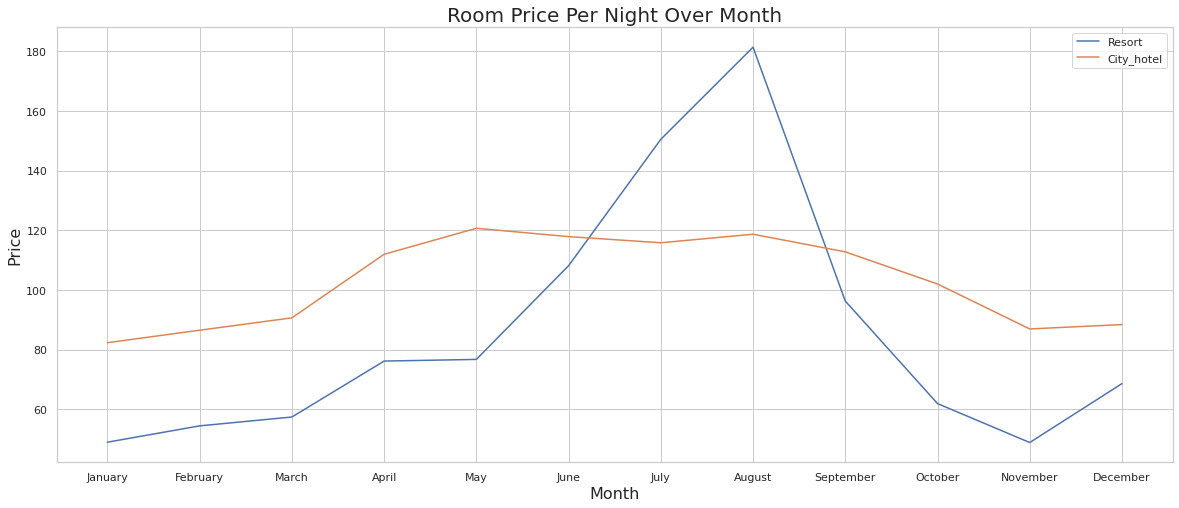

In [280]:
# Line Plot
plt.figure(figsize=(20,8))
plt.plot(Final_Data_Arrange['Month'],Final_Data_Arrange['Resort_Hotel_Price'],label='Resort')
plt.plot(Final_Data_Arrange['Month'],Final_Data_Arrange['City_Hotel_Price'],label='City_hotel')
plt.grid(True)
plt.title("Room Price Per Night Over Month", fontsize=20)
plt.xlabel("Month", fontsize=16)
plt.ylabel("Price", fontsize=16)
plt.legend(loc="upper right")
plt.show()

In [281]:
# line Plot
px.line(Final_Data_Arrange,
        x="Month",
        y="Resort_Hotel_Price", template = 'plotly_dark',title= 'Room Price Per Night Over Month')
#sns.lineplot(Final_Data_Arrange, x = 'Month', y = ["Resort_Hotel_Price","City_Hotel_Price","index"])

In [282]:
# Line Plot
px.line(Final_Data_Arrange,
        x="Month",
        y='City_Hotel_Price', template = 'plotly_dark',title= 'Room Price Per Night Over Month')

##### Conclusion-->> 
    This clearly shows that the prices in the Resort hotel are much higher during the summer (no surprise here).
    The price of the city hotel varies less and is most expensive during spring and autumn.

####Distribution of Nights Spent at Hotels by Market Segment and Hotel Type

In [283]:
# First Look
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,stay_duration,Total_members
0,Resort Hotel,0,48,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,0,2
1,Resort Hotel,0,48,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,0,2
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,1,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,1,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015-07-01,2,2


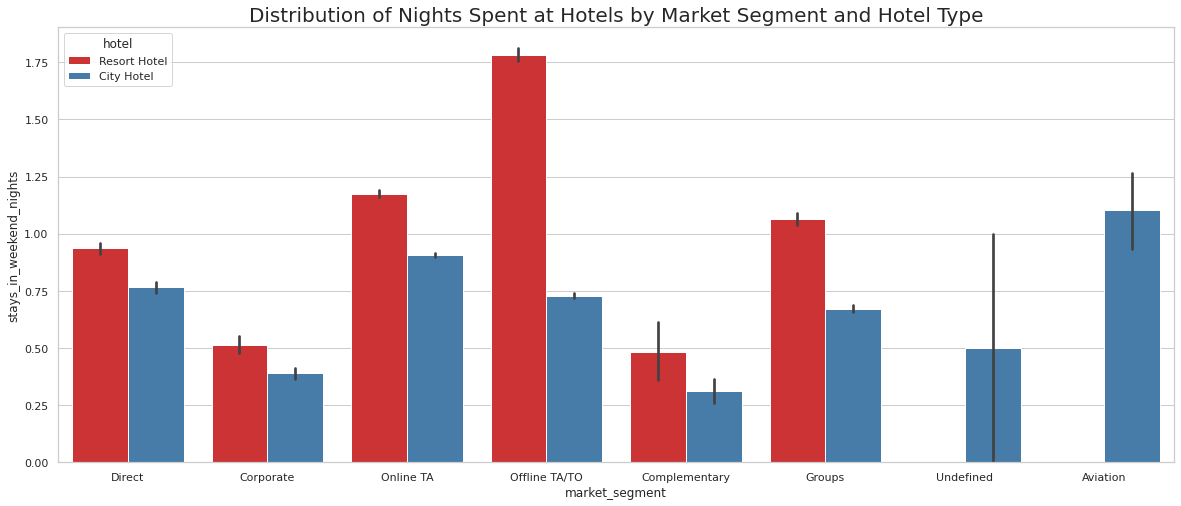

In [284]:
# Bar Plot
plt.figure(figsize=(20,8))
plt.title("Distribution of Nights Spent at Hotels by Market Segment and Hotel Type",fontsize=20)
sns.barplot(x='market_segment',y='stays_in_weekend_nights',data=df,hue='hotel',palette = 'Set1' )


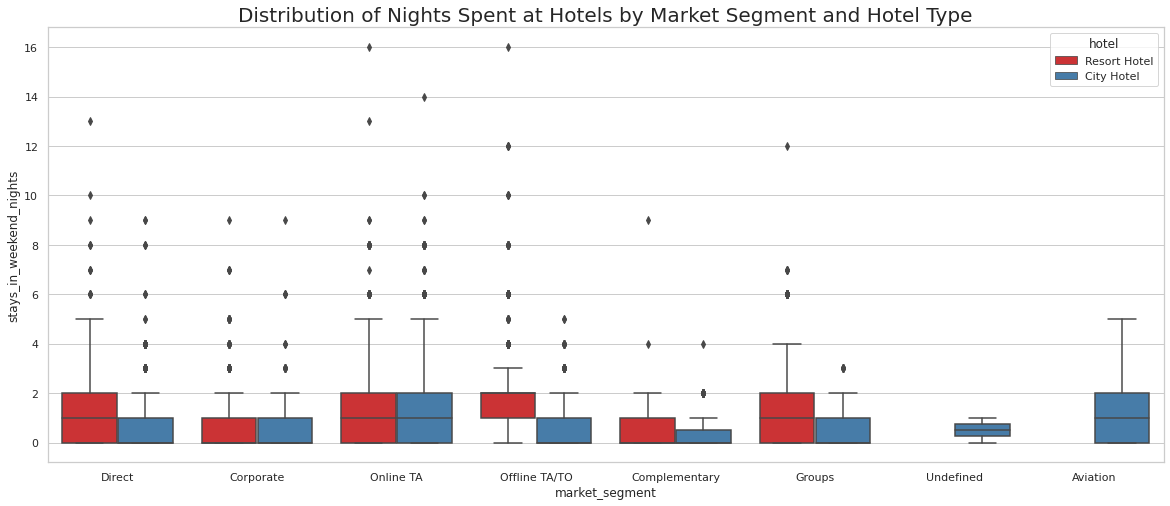

In [285]:
# Box Plot
plt.figure(figsize=(20,8))
plt.title("Distribution of Nights Spent at Hotels by Market Segment and Hotel Type",fontsize=20)
sns.boxplot(x='market_segment',y='stays_in_weekend_nights',data=df,hue='hotel',palette = 'Set1')

##### Conclusion-->>
    It can be seen that most of the groups are normal distributed, some of them have high skewness.
    Looking at the distribution, most people do not seem to prefer to stay at the hotel for more than 1 week.
    But it seems normal to stay in resort hotels for up to 8-10 days
    It is obvious that when people go to resort hotels, they prefer to stay more.

####Analysing Preference of Guests, what they basically Prefer Meal?

In [286]:
# Meal Data list
df['meal'].value_counts()

BB           91779
HB           14426
SC           10547
Undefined     1165
FB             798
Name: meal, dtype: int64

In [287]:
# Hollow Pie Plot
px.pie(df,values=df['meal'].value_counts(),names=df['meal'].value_counts().index,hole=0.5,title='Meal Analysis')

In [288]:
# Pie Plot
px.pie(df,values = df['meal'].value_counts(),names=df['meal'].value_counts().index,title='Meal Analysis')

##### Conclusion-->>
    Below the donut pie graph shows the meal categories. 
    There is a big difference in the Bed&Breakfast category and the others. 
    Almost 80% of bookings reserved for Bed&Breakfast.

####Analyse Special Request done by Customers ?

In [289]:
# Finding the special request from The Customer
# first look
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,stay_duration,Total_members
0,Resort Hotel,0,48,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,0,2
1,Resort Hotel,0,48,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,0,2
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,1,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,1,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015-07-01,2,2


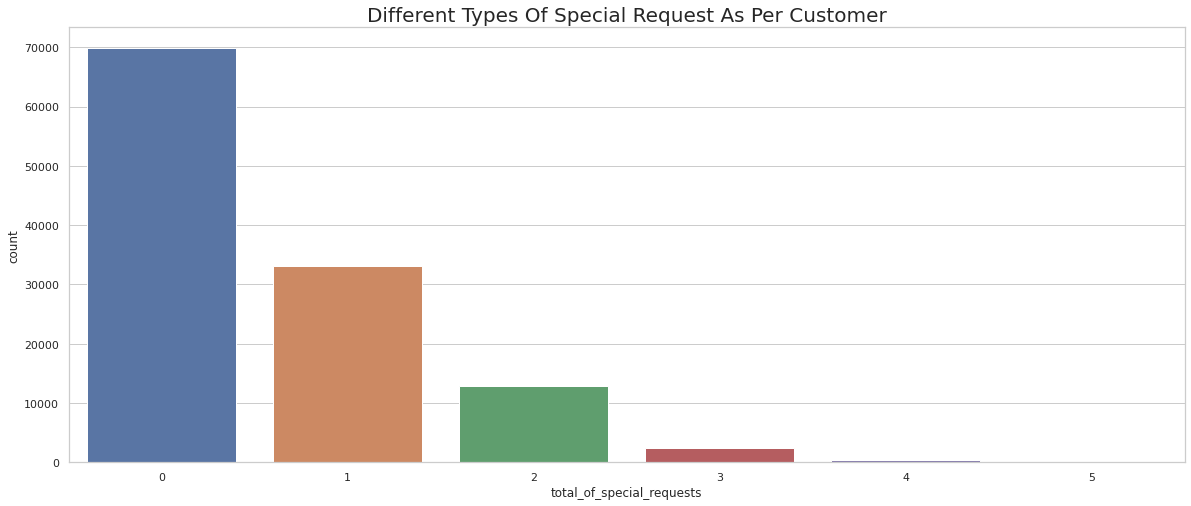

In [290]:
# Plotting of the Special Request From the Customer in the Form of Bar chart
# Bar Chart
plt.figure(figsize=(20,8))
plt.title("Different Types Of Special Request As Per Customer",fontsize=20)
sns.countplot(df['total_of_special_requests'])

##### Conclusion-->> 
    Around 55% of bookings do not have any special requests

In [291]:
# Columns look
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'arrival_date',
       'stay_duration', 'Total_members'],
      dtype='object')

In [292]:
# Separting the data of special Request and creating new columns 
pivot_graph = df.groupby(['total_of_special_requests','is_canceled']).agg({'total_of_special_requests':'count'}).rename(columns={'total_no_of_special_requests':'Count'}).unstack()

In [293]:
# First Look
pivot_graph

total_of_special_requests       
is_canceled                                       0      1
total_of_special_requests                                 
0                                             36393  33476
1                                             25767   7312
2                                             10046   2860
3                                              2041    443
4                                               303     36
5                                                37      1

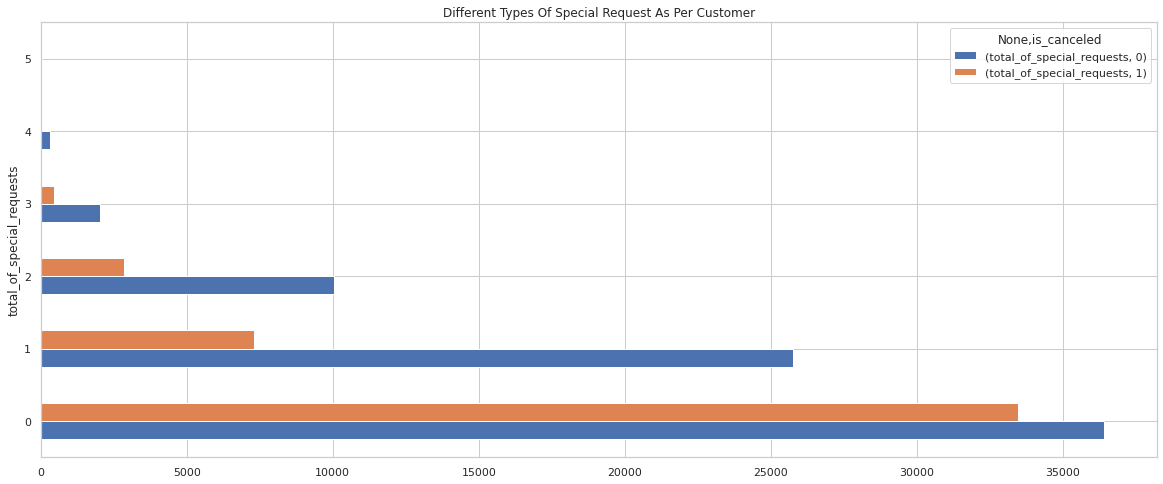

In [294]:
# Bar Plot
plt.rcParams["figure.figsize"]=20,8
#plt.title("Different Types Of Special Request As Per Customer",fontsize=20)
pivot_graph.plot(kind='barh',title ='Different Types Of Special Request As Per Customer', )


##### Conclusion-->> 
    This graph is about the relationship between special requests and cancellation booking status. 
    Nearly half bookings without any special requests have been cancelled and another half of them have not been canceled.

####Which are the most busy month or in which months Guests are high?

In [295]:
# Creating the list of total number of Guest According the munber of months for Resort Hotel analysis
resort_rush = data_resort['arrival_date_month'].value_counts().reset_index()
resort_rush.columns=(['Month','No_Of_Guest_In_Resort'])
resort_rush

,Month,No_Of_Guest_In_Resort
0,August,3237
1,July,3110
2,October,2528
3,May,2523
4,April,2518
5,March,2516
6,February,2253
7,September,2077
8,June,2026
9,December,1970


In [296]:
# Creating the list of total number of Guest According the munber of months for City Hotel analysis
city_rush = data_city['arrival_date_month'].value_counts().reset_index()
city_rush.columns=(['Month','No_Of_Guest_In_City'])
city_rush

,Month,No_Of_Guest_In_City
0,August,5367
1,July,4770
2,May,4568
3,June,4358
4,October,4325
5,September,4283
6,March,4049
7,April,4010
8,February,3051
9,November,2674


In [297]:
# Merging data Of City and  Resort according to the Month
final_rush = resort_rush.merge(city_rush,on='Month')
final_rush

,Month,No_Of_Guest_In_Resort,No_Of_Guest_In_City
0,August,3237,5367
1,July,3110,4770
2,October,2528,4325
3,May,2523,4568
4,April,2518,4010
5,March,2516,4049
6,February,2253,3051
7,September,2077,4283
8,June,2026,4358
9,December,1970,2377


In [298]:
# Sorting the Month in proper manner for better Analysis 
Final_rush_Data_Arrange = sd.Sort_Dataframeby_Month(final_rush,'Month')
Final_rush_Data_Arrange

,Month,No_Of_Guest_In_Resort,No_Of_Guest_In_City
0,January,1812,2248
1,February,2253,3051
2,March,2516,4049
3,April,2518,4010
4,May,2523,4568
5,June,2026,4358
6,July,3110,4770
7,August,3237,5367
8,September,2077,4283
9,October,2528,4325


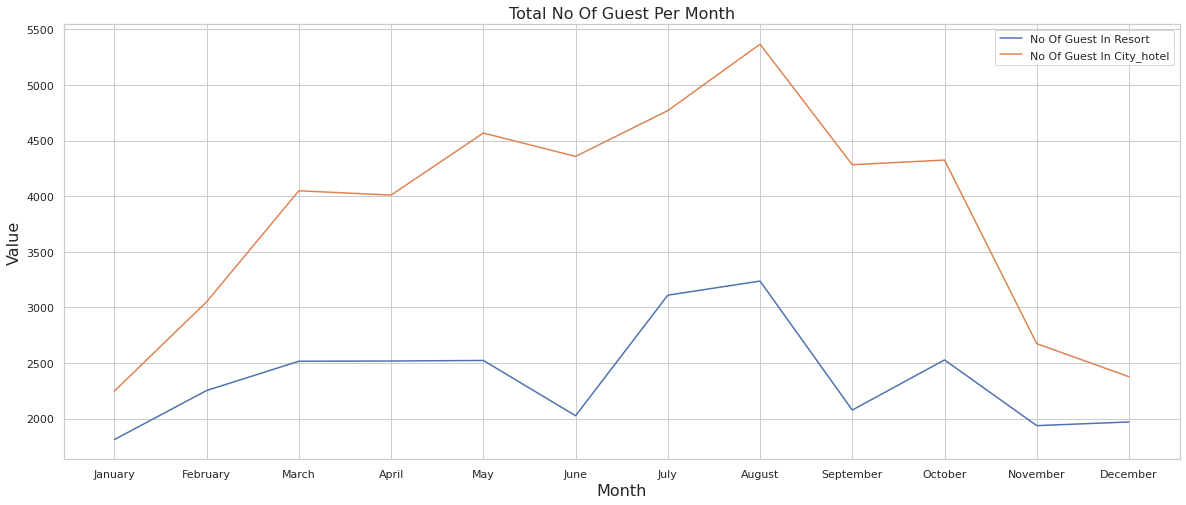

In [299]:
# line Plot
plt.figure(figsize=(20,8))
plt.plot(Final_rush_Data_Arrange['Month'],Final_rush_Data_Arrange['No_Of_Guest_In_Resort'],label='No Of Guest In Resort')
plt.plot(Final_rush_Data_Arrange['Month'],Final_rush_Data_Arrange['No_Of_Guest_In_City'],label='No Of Guest In City_hotel')
plt.grid(True)
plt.title("Total No Of Guest Per Month", fontsize=16)
plt.xlabel("Month", fontsize=16)
plt.ylabel("Value", fontsize=16)
plt.legend(loc="upper right")
plt.show()

##### Conclusion --->>
    The City hotel has more guests during spring and autumn, when the prices are also highest.
    In July and August there are less visitors, although prices are lower.

    Guest numbers for the Resort hotel go down slighty from June to September, which is also when the prices are highest.
    Both hotels have the fewest guests during the winter.

####How Long Do People Stay At The Hotels?

In [300]:
# First Look
data2.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,stay_duration,Total_members
0,Resort Hotel,0,48,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,0,2
1,Resort Hotel,0,48,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,0,2
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,1,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,1,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015-07-01,2,2


In [301]:
# Adding Two Columns
data2['total_nights'] = data2['stays_in_weekend_nights'] + data2['stays_in_week_nights']

In [302]:
# Importing Warings To Ignore the Warning
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [303]:
data2.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,stay_duration,Total_members,total_nights
0,Resort Hotel,0,48,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,0,2,0
1,Resort Hotel,0,48,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,0,2,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,1,1,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,1,1,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015-07-01,2,2,2


In [304]:
# Creating data frame for the particular analysis
stay = data2.groupby(['total_nights','hotel']).agg('count').reset_index()
stay = stay.iloc[:,0:3]
# First look
stay.head()

,total_nights,hotel,is_canceled
0,0,City Hotel,251
1,0,Resort Hotel,366
2,1,City Hotel,9155
3,1,Resort Hotel,6368
4,2,City Hotel,10982


In [305]:
# Renaming the Columns Name
stay = stay.rename(columns={'is_canceled':"No_Of_Stays"})
stay.head()

,total_nights,hotel,No_Of_Stays
0,0,City Hotel,251
1,0,Resort Hotel,366
2,1,City Hotel,9155
3,1,Resort Hotel,6368
4,2,City Hotel,10982


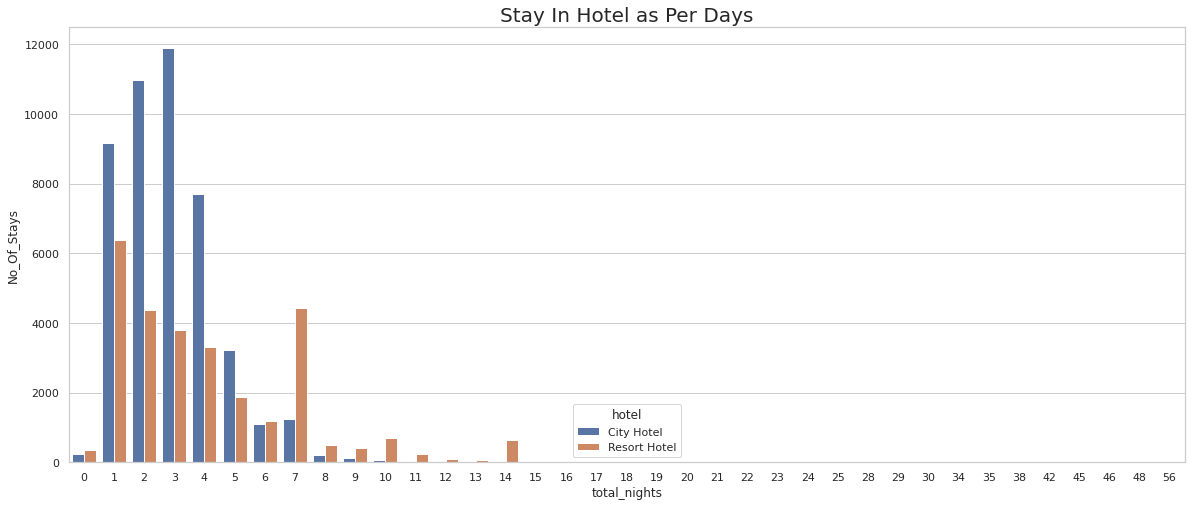

In [306]:
# Bar Plot
plt.title("Stay In Hotel as Per Days",fontsize=20)
sns.barplot(x='total_nights',y='No_Of_Stays',hue='hotel',hue_order=['City Hotel','Resort Hotel'],data=stay)


####Bookings by Market Segment

In [307]:
# First Look Of Columns
data2.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'arrival_date',
       'stay_duration', 'Total_members', 'total_nights'],
      dtype='object')

In [308]:
# Exploring Market Segment Data
data2['market_segment'].value_counts()

Online TA        35598
Offline TA/TO    15854
Direct           10504
Groups            7691
Corporate         4120
Complementary      637
Aviation           183
Name: market_segment, dtype: int64

In [309]:
# Pie Plot
px.pie(data2,values=data2['market_segment'].value_counts(),names=data2['market_segment'].value_counts().index,title='Booking Per Market Segment')

####Reserved Room type

In [310]:
df.reserved_room_type.value_counts()

A    85467
D    19147
E     6481
F     2887
G     2081
B     1115
C      930
H      601
L        6
Name: reserved_room_type, dtype: int64

In [311]:
Reserved_Room = df.assigned_room_type.value_counts().sort_index().reset_index()
Reserved_Room

,index,assigned_room_type
0,A,73819
1,B,2153
2,C,2349
3,D,25149
4,E,7730
5,F,3732
6,G,2535
7,H,707
8,I,353
9,K,187


In [312]:
Reserved_Room.rename(columns={'index':'Room_Type','assigned_room_type':'Count'},inplace=True)
Reserved_Room

,Room_Type,Count
0,A,73819
1,B,2153
2,C,2349
3,D,25149
4,E,7730
5,F,3732
6,G,2535
7,H,707
8,I,353
9,K,187


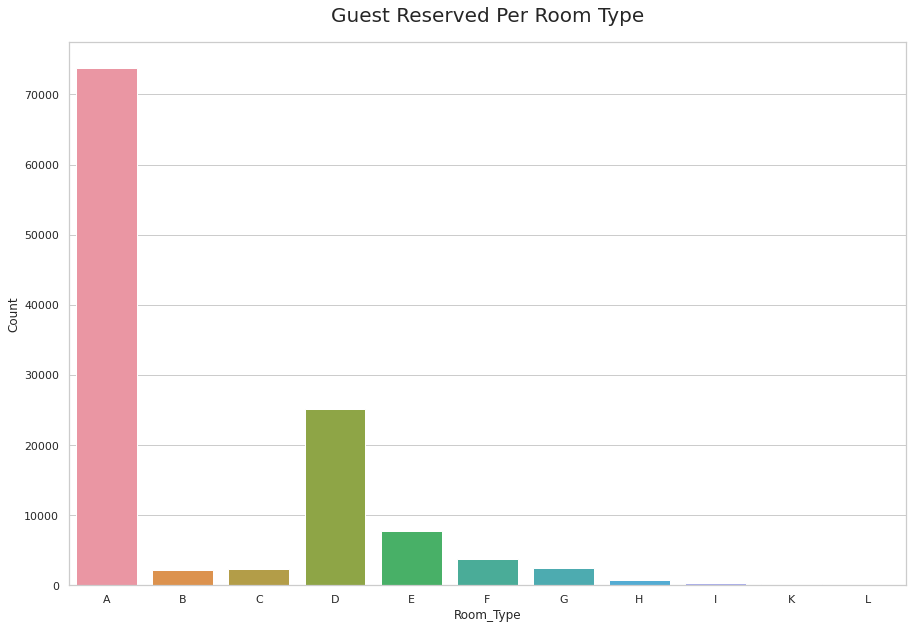

In [313]:
plt.figure(figsize=(15,10))
plt.title('Guest Reserved Per Room Type',fontsize=20,pad=20)
sns.barplot(x = Reserved_Room['Room_Type'],y=Reserved_Room['Count'])
plt.show()

####Assigned Room type?

1.   List item
2.   List item



In [314]:
df.assigned_room_type.value_counts()

A    73819
D    25149
E     7730
F     3732
G     2535
C     2349
B     2153
H      707
I      353
K      187
L        1
Name: assigned_room_type, dtype: int64

In [315]:
Assigned_Room = df.assigned_room_type.value_counts().sort_index().reset_index()
Assigned_Room

,index,assigned_room_type
0,A,73819
1,B,2153
2,C,2349
3,D,25149
4,E,7730
5,F,3732
6,G,2535
7,H,707
8,I,353
9,K,187


In [316]:
Assigned_Room.rename(columns={'index':'Room_Type','assigned_room_type':'Count'},inplace=True)
Assigned_Room

,Room_Type,Count
0,A,73819
1,B,2153
2,C,2349
3,D,25149
4,E,7730
5,F,3732
6,G,2535
7,H,707
8,I,353
9,K,187


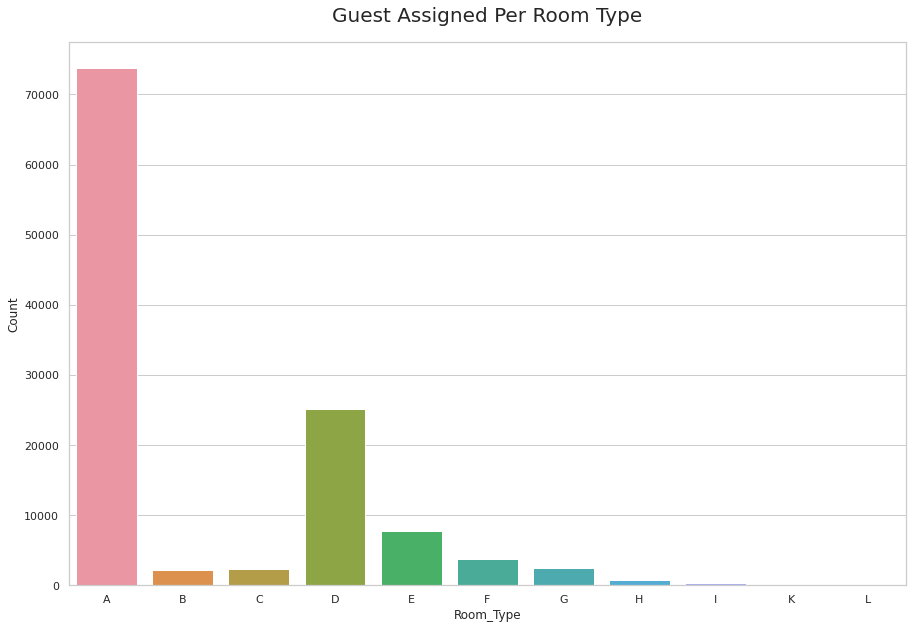

In [317]:
plt.figure(figsize=(15,10))
plt.title('Guest Assigned Per Room Type',fontsize=20,pad=20)
sns.barplot(x = Assigned_Room['Room_Type'],y=Assigned_Room['Count'])
plt.show()

####Booking From the Customer As per Price and Reserved Roomtype ?



In [318]:
# First Look To Columns
data2.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'arrival_date',
       'stay_duration', 'Total_members', 'total_nights'],
      dtype='object')

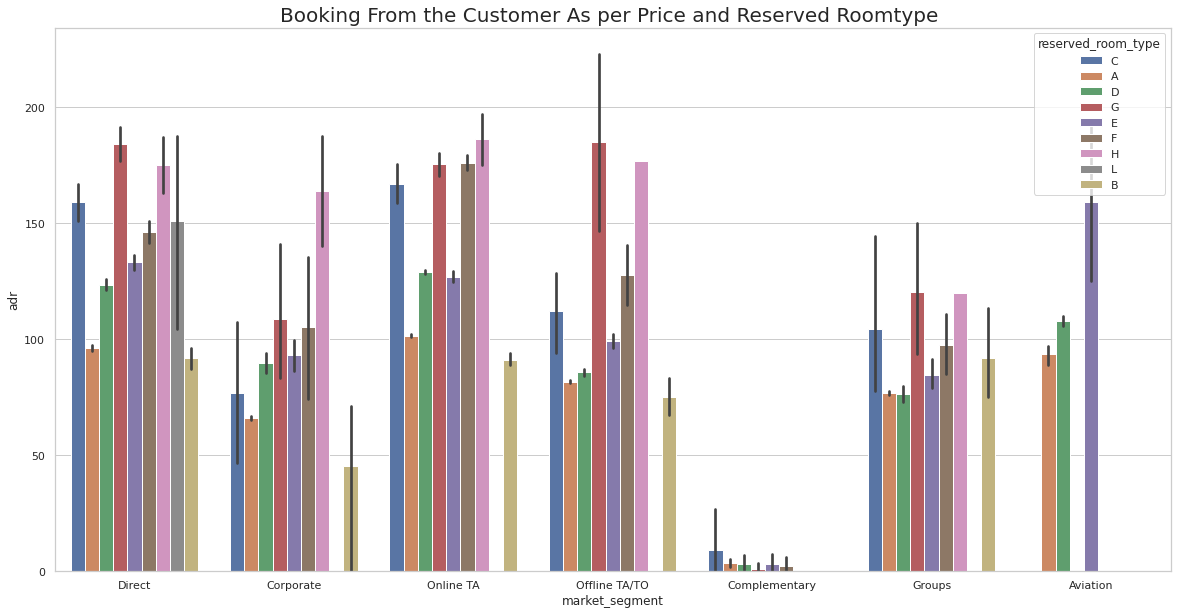

In [319]:
# Bar Plot
plt.figure(figsize=(20,10))
plt.title('Booking From the Customer As per Price and Reserved Roomtype ',fontsize=20)
sns.barplot(x='market_segment',y='adr',hue='reserved_room_type',data=data2)

####How Many Booking Were Cancelled?

In [320]:
# First Look To Columns
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'arrival_date',
       'stay_duration', 'Total_members'],
      dtype='object')

In [321]:
# Exploring The cancelled Data 
canceled = df[df['is_canceled']==1]

In [322]:
# Length of the Cancelled data for Resort Hotel 
len(canceled[canceled['hotel']=='Resort Hotel'])

11064

In [323]:
# Length of the Cancelled data for City Hotel 
len(canceled[canceled['hotel']=='City Hotel'])

33064

In [324]:
# Hollo Pie Plot 
px.pie(canceled,values=[11120,33079],names=['Resort_Hotel_Cancelltion','City_Hotel_Cancellation'],hole=.5,title='Booking Cancelled')

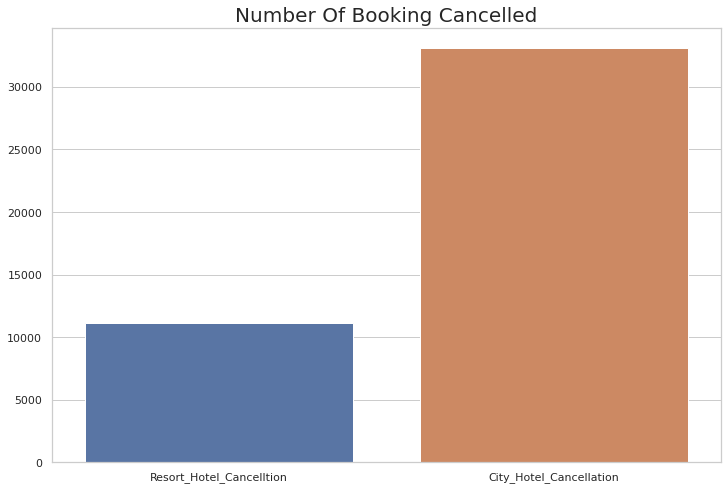

In [325]:
# Bar Plot
plt.figure(figsize=(12,8))
plt.title('Number Of Booking Cancelled',fontsize=20)
sns.barplot( x=['Resort_Hotel_Cancelltion','City_Hotel_Cancellation'], y=[11120,33079] )

####Which Month Has The Heighest No Of Cancellation

In [326]:
# First Look
canceled.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'arrival_date',
       'stay_duration', 'Total_members'],
      dtype='object')

In [327]:
canceled.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,stay_duration,Total_members
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,82.0,0,1,Canceled,2015-05-06,2015-07-01,3,2
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,0,Transient,105.5,0,0,Canceled,2015-04-22,2015-07-01,3,2
10,Resort Hotel,1,23,2015,July,27,1,0,4,2,0,0,BB,PRT,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,0,Transient,123.0,0,0,Canceled,2015-06-23,2015-07-01,4,2
27,Resort Hotel,1,60,2015,July,27,1,2,5,2,0,0,BB,PRT,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,0,Transient,107.0,0,2,Canceled,2015-05-11,2015-07-01,7,2
31,Resort Hotel,1,96,2015,July,27,1,2,8,2,0,0,BB,PRT,Direct,Direct,0,0,0,E,E,0,No Deposit,0,Transient,108.3,0,2,Canceled,2015-05-29,2015-07-01,10,2


In [328]:
# Checking Unique Data
canceled['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [329]:
# Creating New Data frame For Cancellation According to the month for both Resort Hotel and City Hotel
cancel_month = canceled.groupby(['arrival_date_month','hotel']).agg('count').reset_index()
cancelled = cancel_month.iloc[:,0:3]

In [330]:
# First Look
cancelled

,arrival_date_month,hotel,is_canceled
0,April,City Hotel,3459
1,April,Resort Hotel,1051
2,August,City Hotel,3600
3,August,Resort Hotel,1636
4,December,City Hotel,1737
5,December,Resort Hotel,626
6,February,City Hotel,1899
7,February,Resort Hotel,794
8,January,City Hotel,1481
9,January,Resort Hotel,324


In [331]:
# Renaming The Columns
cancelled = cancelled.rename(columns={'is_canceled':'no of cancellations'})
cancelled

,arrival_date_month,hotel,no of cancellations
0,April,City Hotel,3459
1,April,Resort Hotel,1051
2,August,City Hotel,3600
3,August,Resort Hotel,1636
4,December,City Hotel,1737
5,December,Resort Hotel,626
6,February,City Hotel,1899
7,February,Resort Hotel,794
8,January,City Hotel,1481
9,January,Resort Hotel,324


In [332]:
# Arranging The Data According to the Months
final_cancelled = sd.Sort_Dataframeby_Month(cancelled,'arrival_date_month')
final_cancelled

,arrival_date_month,hotel,no of cancellations
0,January,City Hotel,1481
1,January,Resort Hotel,324
2,February,City Hotel,1899
3,February,Resort Hotel,794
4,March,City Hotel,2384
5,March,Resort Hotel,762
6,April,City Hotel,3459
7,April,Resort Hotel,1051
8,May,City Hotel,3653
9,May,Resort Hotel,1024


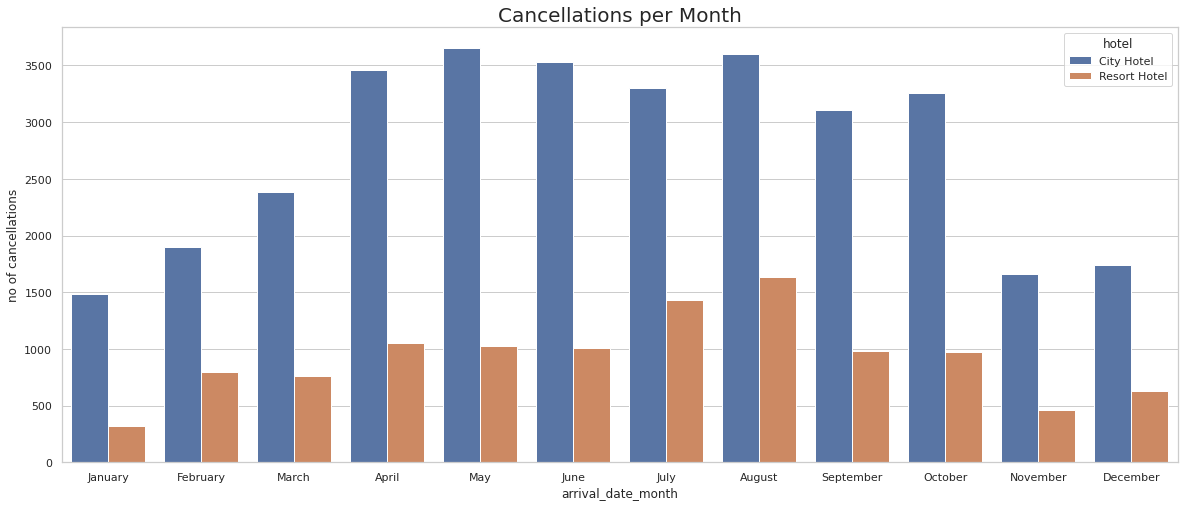

In [333]:
# Bar Plot
plt.figure(figsize=(20, 8))
plt.title('Cancellations per Month',fontsize=20)
sns.barplot(x = "arrival_date_month", y = "no of cancellations" , hue="hotel",
            hue_order = ["City Hotel", "Resort Hotel"], data=final_cancelled)

#####For the City hotel the relative number of cancelations is around 40 % throughout the year.
For the Resort hotel it is highest in the summer and lowest during the winter.

##### Which Year Has The Heighest No Of Cancellation

In [334]:
canceled=canceled.reset_index()

In [335]:
canceled.head()

,index,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,stay_duration,Total_members
0,8,Resort Hotel,1,85,2015,July,27,1,0,3,2,0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,82.0,0,1,Canceled,2015-05-06,2015-07-01,3,2
1,9,Resort Hotel,1,75,2015,July,27,1,0,3,2,0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,0,Transient,105.5,0,0,Canceled,2015-04-22,2015-07-01,3,2
2,10,Resort Hotel,1,23,2015,July,27,1,0,4,2,0,0,BB,PRT,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,0,Transient,123.0,0,0,Canceled,2015-06-23,2015-07-01,4,2
3,27,Resort Hotel,1,60,2015,July,27,1,2,5,2,0,0,BB,PRT,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,0,Transient,107.0,0,2,Canceled,2015-05-11,2015-07-01,7,2
4,31,Resort Hotel,1,96,2015,July,27,1,2,8,2,0,0,BB,PRT,Direct,Direct,0,0,0,E,E,0,No Deposit,0,Transient,108.3,0,2,Canceled,2015-05-29,2015-07-01,10,2


In [336]:
cancel_year_df = canceled[['hotel','arrival_date_year','index']]
cancel_year_df

,hotel,arrival_date_year,index
0,Resort Hotel,2015,8
1,Resort Hotel,2015,9
2,Resort Hotel,2015,10
3,Resort Hotel,2015,27
4,Resort Hotel,2015,31
...,...,...,...
44123,City Hotel,2017,108176
44124,City Hotel,2017,110696
44125,City Hotel,2017,111261
44126,City Hotel,2017,111262


In [337]:
cancel_year=cancel_year_df.groupby(['hotel','arrival_date_year']).agg('count').reset_index()

In [338]:
cancel_year

,hotel,arrival_date_year,index
0,City Hotel,2015,5989
1,City Hotel,2016,15395
2,City Hotel,2017,11680
3,Resort Hotel,2015,2107
4,Resort Hotel,2016,4910
5,Resort Hotel,2017,4047


In [339]:
cancel_year.rename(columns={'index':'count'},inplace=True)
cancel_year

,hotel,arrival_date_year,count
0,City Hotel,2015,5989
1,City Hotel,2016,15395
2,City Hotel,2017,11680
3,Resort Hotel,2015,2107
4,Resort Hotel,2016,4910
5,Resort Hotel,2017,4047


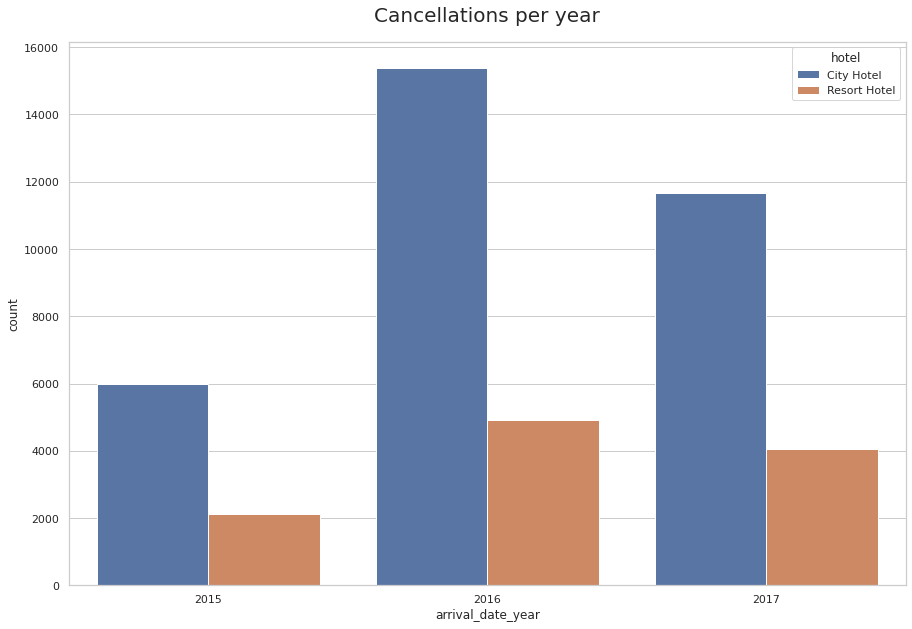

In [340]:
plt.figure(figsize=(15,10))
plt.title('Cancellations per year',fontsize=20,pad=20)
sns.barplot(x = cancel_year['arrival_date_year'],y=cancel_year['count'],hue=cancel_year['hotel'])
plt.show()

####Required Car Parking Space ?

In [341]:
df.required_car_parking_spaces.value_counts()

0    111412
1      7270
2        28
3         3
8         2
Name: required_car_parking_spaces, dtype: int64

In [342]:
df.required_car_parking_spaces.value_counts(normalize=True)

0    0.938483
1    0.061239
2    0.000236
3    0.000025
8    0.000017
Name: required_car_parking_spaces, dtype: float64

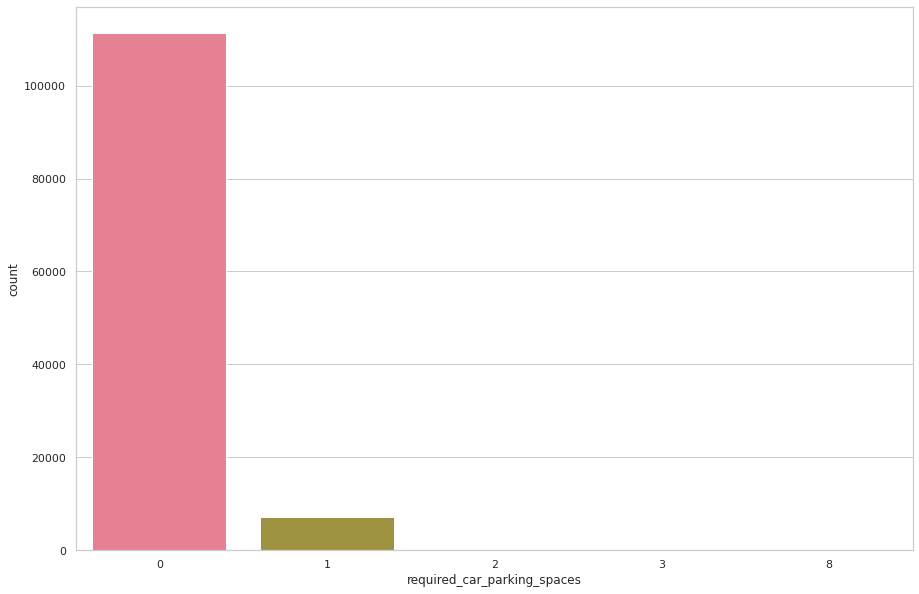

In [343]:
plt.figure(figsize=(15,10))
sns.countplot(df['required_car_parking_spaces'], palette='husl')
plt.show()

####Deposite Type ?

In [344]:
df.deposit_type.value_counts()

No Deposit    103981
Non Refund     14572
Refundable       162
Name: deposit_type, dtype: int64

In [345]:
df.deposit_type.value_counts(normalize=True)

No Deposit    0.875888
Non Refund    0.122748
Refundable    0.001365
Name: deposit_type, dtype: float64

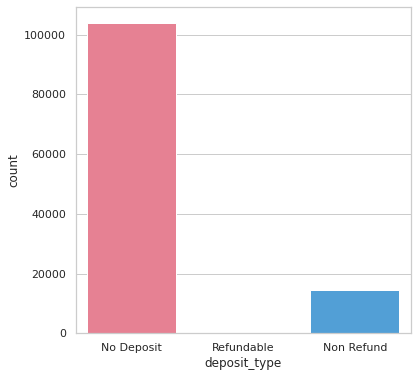

In [346]:
plt.figure(figsize=(6,6))
sns.countplot(df['deposit_type'], palette='husl')
plt.show()

####Which was the most booked accommodation type (Single, Couple, Family)?

In [347]:
df_not_canceled = df[df['is_canceled'] == 0]

In [348]:
## Select single, couple, multiple adults and family
single   = df_not_canceled[(df_not_canceled.adults==1) & (df_not_canceled.children==0) & (df_not_canceled.babies==0)]
couple   = df_not_canceled[(df_not_canceled.adults==2) & (df_not_canceled.children==0) & (df_not_canceled.babies==0)]
#n_adults = df_not_canceled[(df_not_canceled.adults>2) & (df_not_canceled.children==0) & (df_not_canceled.babies==0)]
family   = df_not_canceled[df_not_canceled.adults + df_not_canceled.children + df_not_canceled.babies > 2]


In [349]:
## Make the list of Category names, and their total percentage
names = ['Single', 'Couple (No Children)', 'Family / Friends']
count = [single.shape[0],couple.shape[0], family.shape[0]]
count_percent = [x/df_not_canceled.shape[0]*100 for x in count]

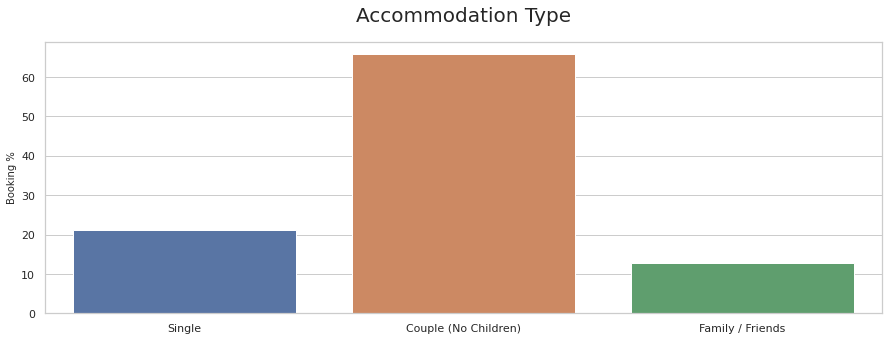

In [350]:
## Bar Plot
plt.figure(figsize=(15,5))
plt.title('Accommodation Type',fontsize=20,pad=20)
plt.ylabel("Booking %", fontsize=10)
sns.barplot(x = names,y = count_percent )
plt.show()

####Arrival Month vs Cancellation ?

arrival_date_month,April,August,December,February,January,July,June,March,May,November,October,September
is_canceled,,,,,,,,,,,,
0,6528,8604,4347,5304,4060,7880,6384,6565,7091,4611,6853,6360
1,4510,5236,2363,2693,1805,4730,4533,3146,4677,2120,4224,4091


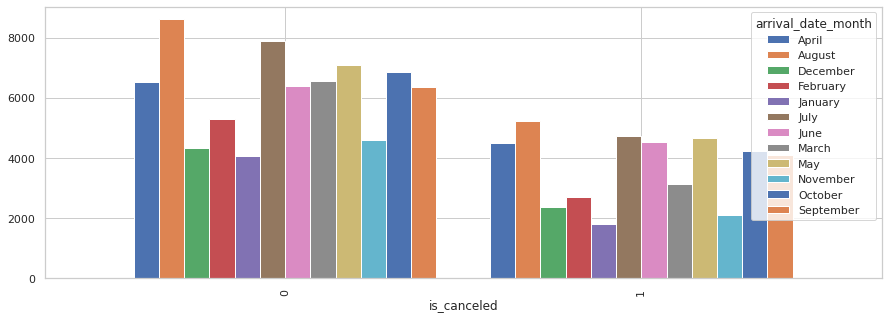

In [351]:
## arrival_date_month vs is_canceled

table_date_month = pd.crosstab(index=df["is_canceled"], 
                                  columns=df["arrival_date_month"])


display(table_date_month )

table_date_month .plot(kind="bar", 
                 figsize=(15,5),
                 stacked=False,
                 width=0.85)

####Reservation_Status vs Cancellation ?

reservation_status,Canceled,Check-Out,No-Show
is_canceled,,,
0,0,74587,0
1,42927,0,1201


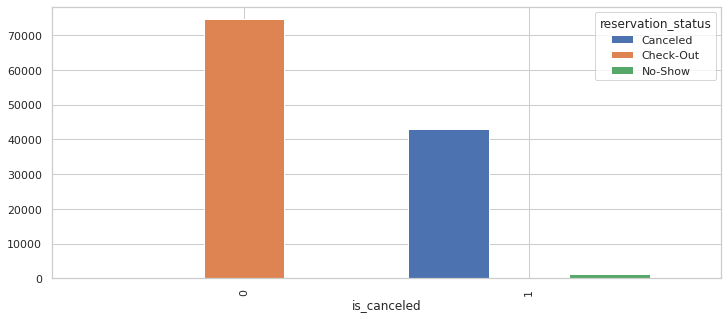

In [352]:
## reservation_status vs is_canceled

table_reservation_status = pd.crosstab(index=df["is_canceled"], 
                                  columns=df["reservation_status"])

display(table_reservation_status )
table_reservation_status.plot(kind="bar", 
                 figsize=(12,5),
                 stacked=False,
                 width=0.85)